<a href="https://www.kaggle.com/code/weihutchinson/day-1-foodfusion-marketing-campaign-data?scriptVersionId=190451319" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
marketing= pd.read_csv('/kaggle/input/foodfusion-marketing-campaign-data/foodfusion_marketing_london.csv')
print(marketing.info())
color = sns.color_palette("colorblind", 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10000 non-null  int64 
 1   date_served          10000 non-null  object
 2   subscribing_channel  10000 non-null  object
 3   converted            10000 non-null  bool  
 4   is_retained          10000 non-null  bool  
 5   dietary_preference   10000 non-null  object
 6   meal_type            10000 non-null  object
 7   location             10000 non-null  object
 8   age_group            10000 non-null  object
dtypes: bool(2), int64(1), object(6)
memory usage: 566.5+ KB
None


1. conversion rate = no. of 'converted'/no. of 'user_id'

In [2]:
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()
total = marketing['user_id'].nunique()
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2),'%')

50.2 %


does conversion_rate vary if dietary_preference, location and age_group are different?

In [3]:
dietary_preference = marketing[marketing['converted']== True].groupby('dietary_preference')['user_id'].nunique()
dietary_preference_conversion = dietary_preference/total
print(round(dietary_preference_conversion*100, 2), '%')

location = marketing[marketing['converted']== True].groupby('location')['user_id'].nunique()
location_conversion = location/total
print(round(location_conversion*100, 2), '%')

age_group = marketing[marketing['converted']== True].groupby('age_group')['user_id'].nunique()
age_group_conversion = age_group/total
print(round(age_group_conversion*100, 2), '%')

dietary_preference
Gluten-Free     9.98
Keto           10.42
Omnivore        9.80
Vegan          10.13
Vegetarian      9.87
Name: user_id, dtype: float64 %
location
Camden                    10.10
Greenwich                 10.36
Hackney                    9.62
Hammersmith and Fulham     9.94
Islington                 10.18
Name: user_id, dtype: float64 %
age_group
0-18 years     8.57
19-24 years    8.05
25-30 years    8.22
31-36 years    8.51
37-45 years    8.37
46+ years      8.48
Name: user_id, dtype: float64 %


The overall subscription rate is 50.2%, indicating strong engagement with the campaigns. Among dietary preferences, Keto has the highest subscription rate at 10.42%, followed by Vegan at 10.13%. Locations with the highest subscription rates are Greenwich (10.36%) and Islington (10.18%), while age groups show relatively balanced subscription rates, with the highest being the 0-18 years group at 8.57%.


daily conversion rate

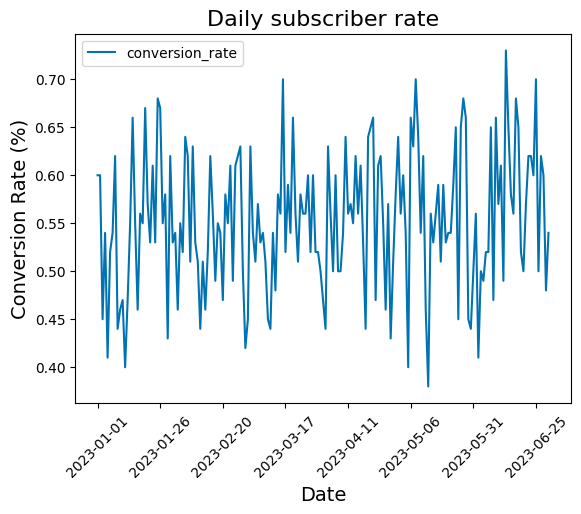

In [4]:
daily_conversion_rate = (marketing.groupby('date_served')['user_id'].nunique()/total) *100
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index())
daily_conversion_rate.columns =['date_subscribed', 'conversion_rate']

daily_conversion_rate.plot('date_subscribed','conversion_rate', kind ='line', color= color)
plt.title('Daily subscriber rate', size =16)
plt.xlabel('Date', size =14)
plt.ylabel('Conversion Rate (%)', size = 14)
plt.xticks(rotation = 45)
plt.show()


The daily subscription rate ranges between 0.4% to 0.7%

Rentention Rate: As mentioned in the task, the discounted period is one month

In [5]:
retention = marketing[marketing['is_retained']==True]['user_id'].nunique()
retention_rate = retention/total
print(round(retention_rate*100,2), '%')

dietary_preference_retention_rate = marketing[marketing['is_retained']==True].groupby('dietary_preference')['user_id'].nunique()/total
print(round(dietary_preference_retention_rate*100, 2), '%')

location_retention_rate = marketing[marketing['is_retained']==True].groupby('location')['user_id'].nunique()/total
print(round(location_retention_rate*100, 2), '%')

meal_type_retention_rate = marketing[marketing['is_retained']==True].groupby('meal_type')['user_id'].nunique()/total
print(round(meal_type_retention_rate*100, 2), '%')


24.76 %
dietary_preference
Gluten-Free    5.18
Keto           4.88
Omnivore       4.96
Vegan          4.82
Vegetarian     4.92
Name: user_id, dtype: float64 %
location
Camden                    4.91
Greenwich                 5.33
Hackney                   4.54
Hammersmith and Fulham    4.86
Islington                 5.12
Name: user_id, dtype: float64 %
meal_type
Breakfast    6.27
Dinner       6.38
Lunch        6.09
Snack        6.02
Name: user_id, dtype: float64 %


The overall retention rate is 24.76%, indicating a moderate level of customer retention after the initial subscription. When examining the data by location, it is clear that Greenwich has the highest retention rate at 5.33%, followed by Islington at 5.12%, Camden at 4.91%, Hammersmith and Fulham at 4.86%, and Hackney at 4.54%. This suggests that customer retention efforts are most effective in Greenwich and Islington, highlighting the potential for increased focus in these areas to maximise customer loyalty.

In terms of meal types, Dinner has the highest retention rate at 6.38%, followed closely by Breakfast at 6.27%. Lunch and Snacks have slightly lower retention rates at 6.09% and 6.02%, respectively. These insights suggest that Dinner and Breakfast options are particularly effective at retaining customers, possibly due to the convenience and variety offered in these meal kits.

Regarding dietary preferences, Gluten-Free has the highest retention rate at 5.18%, followed by Omnivore at 4.96%, Vegetarian at 4.92%, Keto at 4.88%, and Vegan at 4.82%. This indicates that Gluten-Free options are most effective at retaining customers, and there may be opportunities to further improve retention among other dietary preferences.

In [6]:
dietary_preference = marketing[marketing['converted']== True].groupby('dietary_preference')['user_id'].nunique()
dietary_preference_conversion = dietary_preference/total
print(round(dietary_preference_conversion*100, 2), '%')

location = marketing[marketing['converted']== True].groupby('location')['user_id'].nunique()
location_conversion = location/total
print(round(location_conversion*100, 2), '%')

age_group = marketing[marketing['converted']== True].groupby('age_group')['user_id'].nunique()
age_group_conversion = age_group/total
print(round(age_group_conversion*100, 2), '%')

dietary_preference
Gluten-Free     9.98
Keto           10.42
Omnivore        9.80
Vegan          10.13
Vegetarian      9.87
Name: user_id, dtype: float64 %
location
Camden                    10.10
Greenwich                 10.36
Hackney                    9.62
Hammersmith and Fulham     9.94
Islington                 10.18
Name: user_id, dtype: float64 %
age_group
0-18 years     8.57
19-24 years    8.05
25-30 years    8.22
31-36 years    8.51
37-45 years    8.37
46+ years      8.48
Name: user_id, dtype: float64 %


segmentation on subscribing channels & age groups;
segmentation on retained subscriber, dietary preference and date subscribed

age_group            0-18 years  19-24 years  25-30 years  31-36 years  \
subscribing_channel                                                      
Email                       294          270          270          286   
Facebook                    292          258          296          303   
House Ads                   281          275          261          260   
Influencers                 269          299          266          262   
Instagram                   264          261          284          280   
Push                        269          277          294          302   

age_group            37-45 years  46+ years  
subscribing_channel                          
Email                        285        276  
Facebook                     257        273  
House Ads                    286        298  
Influencers                  299        262  
Instagram                    282        279  
Push                         256        274  


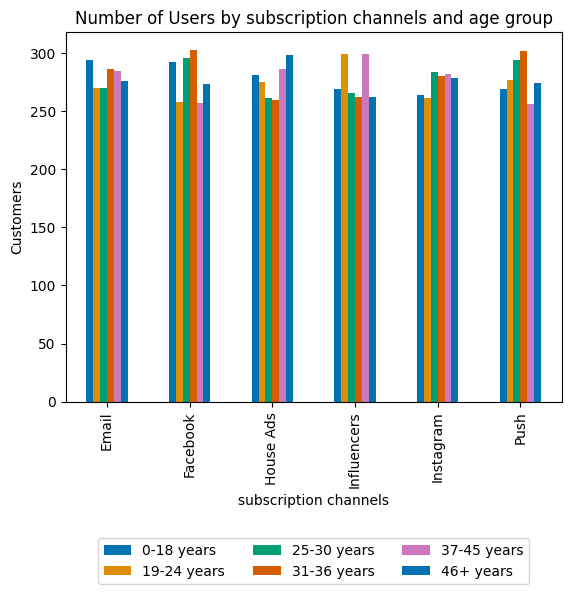

In [7]:
subscribing_segement =marketing.groupby(['subscribing_channel', 'age_group'])['user_id'].nunique()
channel_subscription = subscribing_segement.unstack(level =1).fillna(0)
print(channel_subscription)

channel_subscription.plot(kind='bar',color= color)
plt.title('Number of Users by subscription channels and age group')
plt.xlabel('subscription channels')
plt.ylabel('Customers')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.35), ncol=3, labels = channel_subscription.columns.values)
plt.show()

The Email channel is most effective with young customers below 18 years old, attracting 294 subscribers, and performs well across all other age groups. Facebook is particularly successful with customers aged 31-36, bringing in 303 subscribers, and maintains broad appeal across all age segments. House Ads are the top choice for senior customers above 46 years, with 298 subscribers, and show steady performance with other age groups. Influencer marketing works best for those aged 37-45, garnering 299 subscribers, but is less effective with older customers. Instagram excels with users aged 25 and above, especially in the 25-30 age group, attracting 284 subscribers, while also appealing to older age groups. Push notifications are most effective for the 31-36 age group, with 302 subscribers, and perform consistently across other demographics.


Segement the retained subscribers by dietary preference and date subscribed.

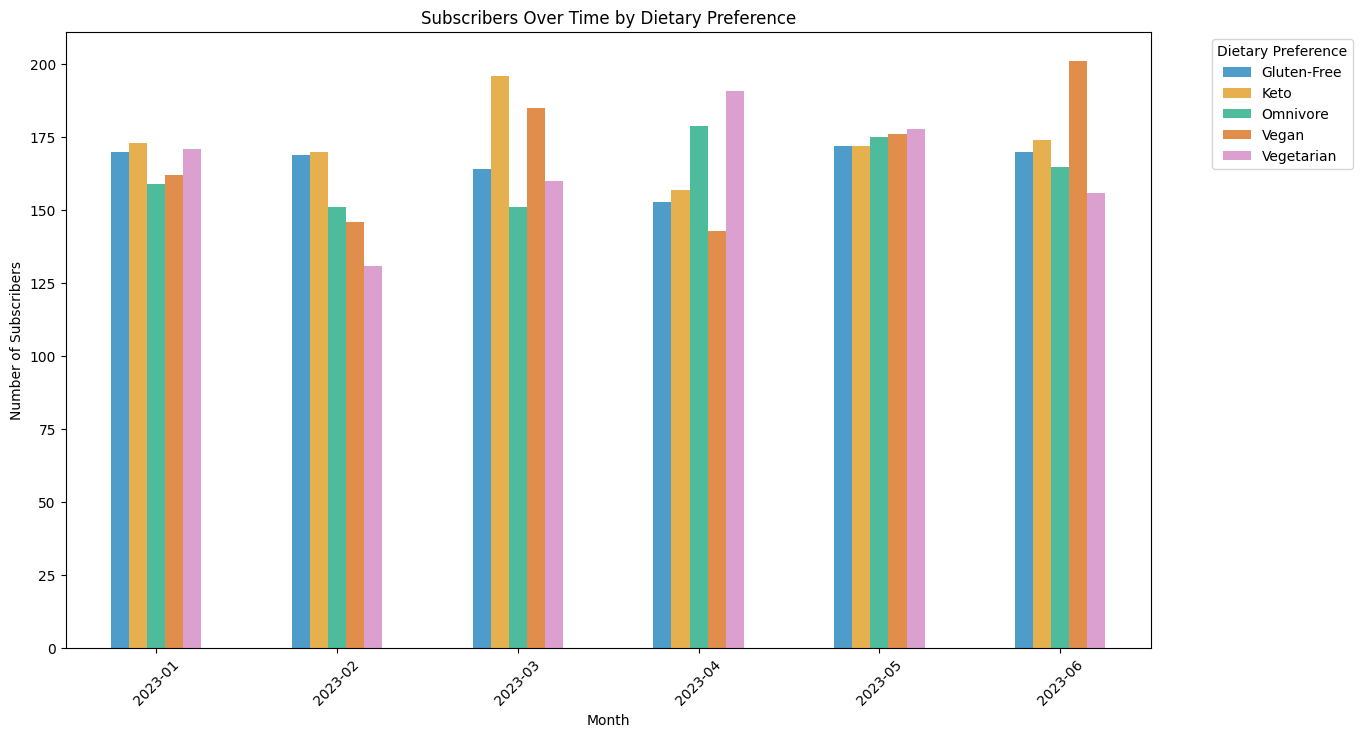

In [8]:
subscriber_segement = marketing[marketing['converted'] == True].groupby(['dietary_preference', 'date_served'])['user_id'].nunique()
subscriber_seg = subscriber_segement.unstack(level=1).fillna(0)
subscriber_seg.columns = pd.to_datetime(subscriber_seg.columns)

subscriber_seg = subscriber_seg.T.groupby([subscriber_seg.columns.year, subscriber_seg.columns.month]).sum().T
subscriber_seg.columns = [f'{year}-{month:02d}' for year, month in subscriber_seg.columns]

fig, ax = plt.subplots(figsize=(14, 8))
subscriber_seg.T.plot(kind='bar', alpha=0.7, ax=ax, color=color)
plt.title('Subscribers Over Time by Dietary Preference')
plt.xlabel('Month')
plt.ylabel('Number of Subscribers')
plt.legend(title='Dietary Preference', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

From January to June 2023, subscriber numbers for dietary preferences showed varied trends. Gluten-Free remained relatively stable with minor fluctuations, peaking in January (170) and May (172). Keto saw a noticeable increase in March (196) but remained stable otherwise. Omnivore subscribers were consistent with a significant rise in April (179) and lowest numbers in February and March (151 each). Vegan subscribers fluctuated, peaking in June (201) and dipping in February (146) and April (143). Vegetarian subscribers showed a substantial increase in April (191) and were lowest in February (131). Overall, Vegan and Vegetarian preferences exhibited more variability, while Gluten-Free and Keto were more stable.

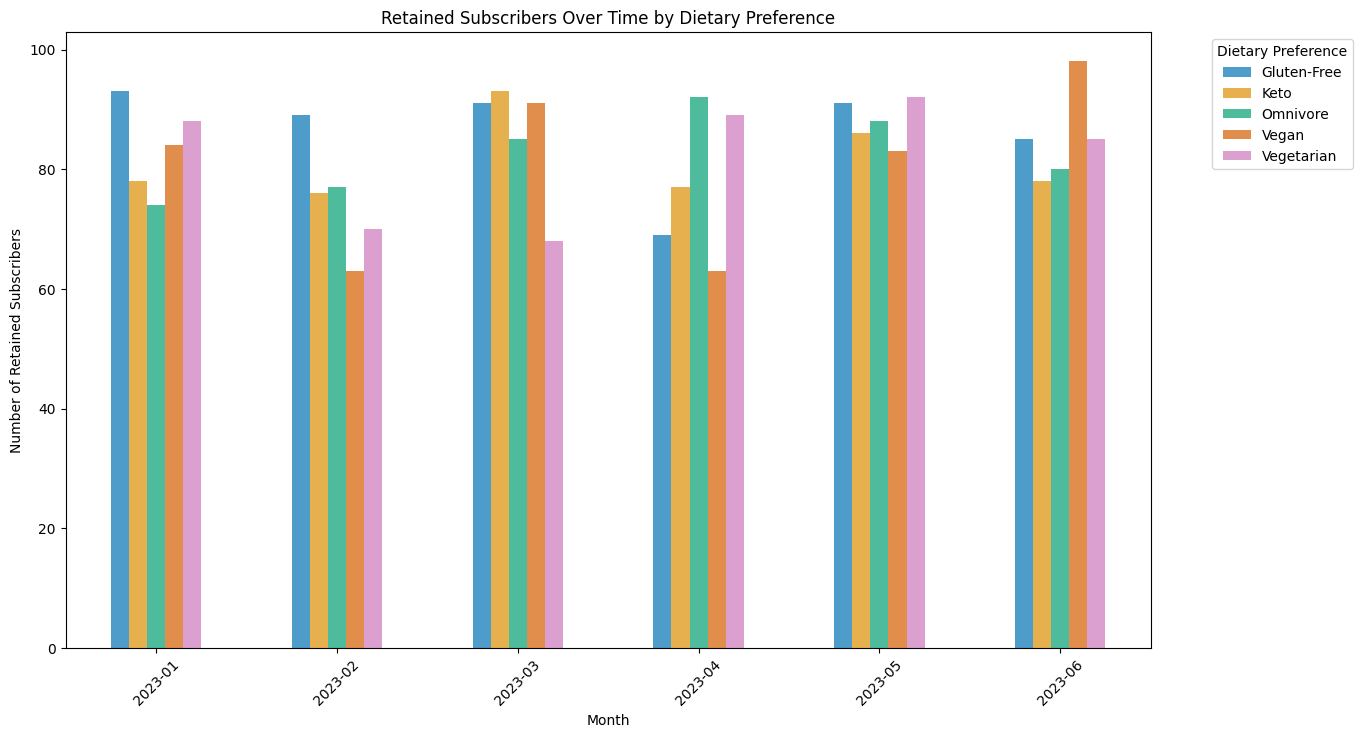

In [9]:
retainer_segement = marketing[marketing['is_retained'] == True].groupby(['dietary_preference', 'date_served'])['user_id'].nunique()
retainer_seg = retainer_segement.unstack(level=1).fillna(0)
retainer_seg.columns = pd.to_datetime(retainer_seg.columns)

retainer_seg = retainer_seg.T.groupby([retainer_seg.columns.year, retainer_seg.columns.month]).sum().T
retainer_seg.columns = [f'{year}-{month:02d}' for year, month in retainer_seg.columns]

fig, ax = plt.subplots(figsize=(14, 8))
retainer_seg.T.plot(kind='bar', alpha=0.7, ax=ax, color=color)
plt.title('Retained Subscribers Over Time by Dietary Preference')
plt.xlabel('Month')
plt.ylabel('Number of Retained Subscribers')
plt.legend(title='Dietary Preference', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

The retention data from January to June 2023 shows consistent engagement across dietary preferences, with notable peaks for Gluten-Free in January (93) and May (91), Keto in March (93), Omnivore in April (92), Vegan in June (98), and Vegetarian in May (92).

**Marketing Recommendations:**

Based on the data, the recommendation would be to focus marketing efforts on increasing subscriptions for Vegan and Vegetarian options during the low-performing months of February and April. Maximising the high subscription rates for Keto in March and Vegan in June with targeted campaigns could be beneficial. Retention efforts should prioritise Gluten-Free subscribers in January and May, and Vegan subscribers in June to maintain high retention rates.

For younger customers below 18, Email campaigns should be the primary focus, as they attract the most subscribers (294). Facebook is particularly effective for the 31-36 age group, with 303 subscribers, making it the recommended channel for this demographic. House Ads are most successful with seniors above 46, with 298 subscribers, suggesting this should be the focus for older customers. Instagram and Push notifications should target users aged 25-36, with Instagram attracting 284 subscribers aged 25-30, and Push notifications performing well with 302 subscribers aged 31-36. 

Although these recommendations may not be immediately intuitive, they are grounded in the insights drawn from the simulated dataset.
